# Introduction to python and Google Colab

This notebook will take you through some basics of python and Google Colab.

### What is Google Colab

Colab is a platform for creating and editing Python Jupyter notebooks (.ipynb files), where all the computation is handled on a remote machine provided by google. Think of it like logging into a computer in the cloud, which you can control using the Jupyter notebook.

You can do (pretty much) anything in this remote machine, as long as you can write code that accomplishes what you need! This includes, downloading data to the machine, using its CPU and GPU, and of course running your code.

Note that Colab is based on linux and all linux commands can be run in the notebook. If you want to run linux commands, you can use the `!` operator preceding the linux command to run it. Note that any line that starts with a `#` is a comment and will not be run. Let's give it a go:

In [1]:
# command for printing the current working directory
!pwd

/content


In [6]:
# command for listing the contents of the working directory
!ls

sample_data


In [7]:
# you can also list thigns in a particular path
!ls /content/sample_data/

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


Changing the working path in Colab is a bit challenging so we will **always use absolute paths** in this module, as in the line above. For example, you could use `!ls sample_data` to list the files in that directory, however, the absolute path `!ls /content/sample_data/` is preferred as it avoids any ambiguity and allows anyone to run your notebook without changing paths.

### Getting set-up for python

We will start with the set-up. All the Jupyter notebooks that you create in this module will need a set-up cell. An example of a set-up cell is below. It does a few things:

1) **Install any required packages** (packages are collections of python scripts and functions that enable a certain functionality, these need to be downloaded from a central repository which we will access using the `pip` command)

2) **Download any required data**: for tutorials, these will be provided as zip files in the module repository, to download, go to the github repositry and click on the file and copy the `Raw` link from the top-right of the page, and then we will use `wget` to download the data into the remote machine.

3) **Make some runtime checks, if needed**: these checks ensure that Google Colab, which runs on a remote machine, is working as expected)

In [12]:
# installing required packages
!pip install torch tensorflow matplotlib nibabel
# pytorch/torch and tensorflow are the main deep leanring packages in python
# matplotlib is the package used for plotting
# nibabel is the package for loading in specialised medical images

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [13]:
# downloading required data
!wget -O data.zip https://github.com/s-sd/EMS741/raw/refs/heads/main/tutorials/intro_to_python/data.zip
# the link was copied from the github repository by right-clicking the Raw button for the specific file
# make sure the name of the file (after -O) matches the one from the link

# check that the file was correctly downloaded
!echo 'Files in current directory:' # echo is the print statement in linux
!ls

--2025-12-26 12:08:01--  https://github.com/s-sd/EMS741/raw/refs/heads/main/tutorials/intro_to_python/data.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/s-sd/EMS741/refs/heads/main/tutorials/intro_to_python/data.zip [following]
--2025-12-26 12:08:01--  https://raw.githubusercontent.com/s-sd/EMS741/refs/heads/main/tutorials/intro_to_python/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3080657 (2.9M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   2.94M  --.-KB/s    in 0.03s   

2025-12-26 12:08:01 (106 MB/s) - ‘data.zip’ saved [3080657/30

In [25]:
# checking the runtime for CPUs
!cat /proc/cpuinfo  | grep 'name'| uniq


model name	: AMD EPYC 7B12


When we train deep leanring models, we would want to use GPUs (because they are very good at doing lots of computations in parallel). As such, to use a GPU, go to `Runtime` above and click `Change runtime type` and then select a GPU. After waiting for the new GPU runtime to load, you can check that the GPU is enable using the following:

In [1]:
# checking the runtime for GPUs
!nvidia-smi

Fri Dec 26 11:48:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   68C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Using python in a Jupyter notebook

When running python code (as opposed to linux), you don't need to add a `!`. So python code will look something like this:

In [3]:
my_variable_x = 256/256
my_variable_y = 4

result = my_variable_x + my_variable_y

print(f'My result: {result}') # f-strings can hold text and variables (variables should be enclosed with curly backets)

My result: 5.0


In python, if you want to use a specific package, you need to import it first. Let's give it a try:

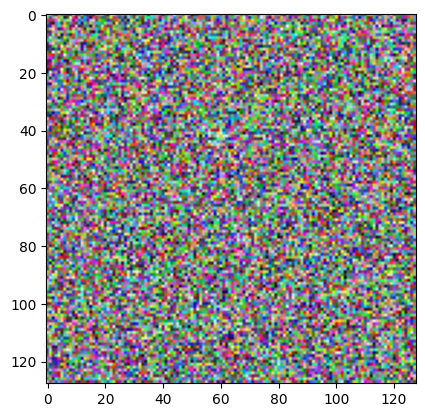

In [9]:
import numpy as np # handles complicated maths computations
import matplotlib.pyplot as plt # handles plotting

# create a random image of size (128, 128, 3) with pixel intensities between 0-1
image = np.random.rand(128, 128, 3)
# when in doubt on what function to use, refer to online resources
# when you find a function always check its docs online e.g., for np.random.rand, you can check: https://numpy.org/devdocs/reference/random/generated/numpy.random.rand.html
# The docs list the expected inputs and outputs of function, they should be your go-to resource

# Ensure pixel intensities are now in range 0-255 (the standard range for images)
image = image * 255.0
image = np.array(image, dtype=np.uint8) # convert the array to integers to make a standard image
# numpy uses elementwise operations by default, even when use use mismatched shape matrices (so be careful in matrix calculations)
# you can also plot images, even if they are not  integers, but you need to ensure all pxiel values are between 0-1
# decimal numbers in python/ numpy as called floats, so a float between 0-1 is also okay for images

# now plot the image
plt.imshow(image)

In [10]:
# now let's access values from the image
# to get the first pixel value at all channels (RGB) we can do
first_pixel_value = image[0, 0, :]
print(first_pixel_value)
# note that python indexing starts at 0, unlike matlab, so be careful
# and we use square brackets for indexing

[ 58 241 207]


Now let's do something a bit more complicated. We will use python to unzip our data.zip file that we downloaded, then we will read the image and plot it.

In [14]:
# check current path
!echo 'Current path:'
!pwd

# check the file exists in the current path
!echo 'Files in current path:'
!ls

Current path:
/content
Files in current path:
data.zip  sample_data


In [15]:
# import the package for unzipping in python
import zipfile
import os  # this package allows file operations

# define your paths
path_to_zip = r'/content/data.zip' # r-strings are raw strings, use these for path so ensure that / is interpreted correctly
path_to_extract_to = r'/content/data/'

# if folder does not exist then create a folder
if not os.path.exists(path_to_extract_to):
  os.mkdir(path_to_extract_to)
# this is how you write an if statement in python
# use a : followed by indentation in the next line

# use the zipfile package to extract the files (this is a code snippent from the docs of the zipfile package)
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall(path_to_extract_to)

In [17]:
# now let's verify that files were extracted
!ls /content/data

case65_MR_2D.png  case65_US.nii.gz  case66_MR.nii.gz
case65_MR.nii.gz  case66_MR_2D.png  case66_US.nii.gz


Files in path:
['case65_MR.nii.gz', 'case66_MR_2D.png', 'case66_MR.nii.gz', 'case65_US.nii.gz', 'case65_MR_2D.png', 'case66_US.nii.gz'] 

PNG files in path:
['case66_MR_2D.png', 'case65_MR_2D.png'] 

Image Shape:
(396, 399, 4) 



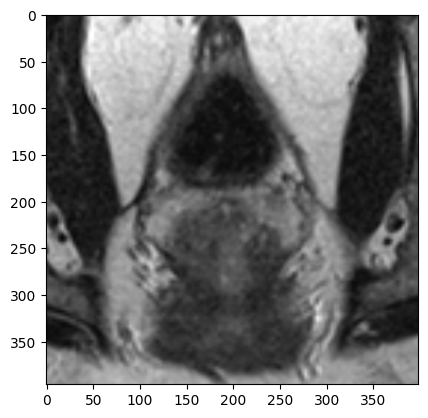

In [26]:
# matplotlib for plotting and nibabel for reading medical images
import matplotlib.pyplot as plt
import nibabel as nib
import os
import numpy as np

data_path = r'/content/data'

files_in_data_path = os.listdir(data_path)
print('Files in path:')
print(files_in_data_path, '\n')
# the comma and '\n' adds an empty line after printing

# extract only the png files
png_files_in_data_path = [elem for elem in files_in_data_path if elem.endswith('png')]
print('PNG files in path:')
print(png_files_in_data_path, '\n')
# we used a latent variable elem and we can put conditions on this latent variable to gather only relevant items from a python list

# let's load the first png file
image = plt.imread(os.path.join(data_path, png_files_in_data_path[0]))

# check its shape
image_shape = np.shape(image)
print('Image Shape:')
print(image_shape, '\n')

# plot the image
plt.imshow(image)

Image shape:  (120, 128, 128, 1) 

Image slice shape:  (120, 128, 1) 



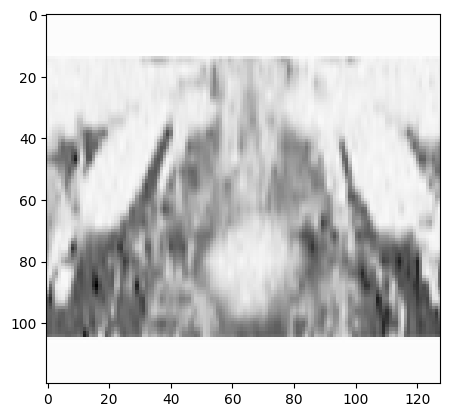

In [36]:
# Now let's load in a medical image with nii.gz file type
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt

image_path = r'/content/data/case66_MR.nii.gz'

# if in doubt check the docs for the relevant package, here you can check the docs for nibabel
nib_image = nib.load(image_path)
image_data = nib_image.get_fdata()

# now let's check the shape
image_shape = np.shape(image_data)
print('Image shape: ', image_shape, '\n')
# This image has 4 dimensions, corresponding to a 3D image, with the fourth dimension being channels
# This is very common for medical images such as MRI and CT as they are acquired in 3D

# Let's try to plot a slice from the image
# we can plot the middle slice in the last dimension
image_slice = image_data[:, :, int(image_shape[2]/2), :]
# the : in the above statement corresponds to 'select all' so we select all values in the first and second dimensions
# then for the thrid dimension we check the image shape at the third dimension (corresponding to [2] as python indexing starts at 0)
# and we pick the middle slice by dividing the third dimension in half
# and we plot all channels

# we now get a slice with shape:
image_slice_shape = np.shape(image_slice)
print('Image slice shape: ', image_slice_shape, '\n')

# we can now directly plot this
plt.imshow(image_slice, cmap='Grays')

### Conclusion

This notebook should give you an introudction to python and Google Colab. Some basics were introuced in the code snippents above, please ensure that you understand all the lines of code above, and if you need extra support please reach out to the lecturers.

 A few things that you should keep in mind:

1) ensure you have set things up correctly before running your python code
2) when using linux commands use `!`
3) be sure to pip install and import the required packages
3) python indexing starts at 0
4) docs for the package of interest cotnain most of the information that you need
5) don't shy away from using online search or genAI, as long as you can understand the code the you are using

A few caveats:

1) although we imported packages multiple times here, you can import them in the first cell and you don't need to reimport again
2) when changing runtime or closing Colab, all your downloaded data/ packages will be reset, so ensure that you run the set-up cells again if your notebook gets reset; your plotted or printed things will remain saved but any saved files will be reset
3) Colab has some packages built-in e.g., numpy, zipfile and the python standard library so you do not need to pip install them
4) Colab will stay active for 30 mins if left unmonitored (e.g., without mouse or keyboard movement), if you want to keep it active for longer then make sure to click on a cell to keep it active
